#### Analysing and Plotting Household data Uttar Pradesh and Maharashtra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Parsing household data and creating a merged dataframe of level 1 and level 3

In [2]:
colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns

colspecs = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs)
columns = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Usual monthly expenses - ABCD", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns


In [3]:
print(dfHH1.shape)
print(dfHH3.shape)

(138798, 16)
(138798, 22)


In [6]:
dfHH1 = dfHH1[dfHH1.Sector == 2] 
dfHH3 = dfHH3[dfHH3.Sector == 2] 

print(dfHH1.shape)
print(dfHH3.shape)

(55902, 16)
(55902, 22)


In [7]:
HH_merge = pd.concat([dfHH1, dfHH3], axis=1)
HH_merge.shape

(55902, 38)

In [8]:
HH_merge.isna().sum()

FSU                                  0
Sector                               0
State                                0
District                             0
Stratum                              0
Sub-stratum                          0
Sample HHID                          0
InformantSI no                      43
Response code                        0
Survey code                          0
Casualty code                    50113
Date of Survey                     380
Date of despatch                  3714
Time to canvass                   1086
NSC                                  0
Multiplier                           0
FSU                                  0
Sector                               0
State                                0
District                             0
Stratum                              0
Sub-stratum                          0
Sample HHID                          0
HH Size                              0
Land Own                          1857
Monthly HH expenses A    

In [9]:
HH_inhabitated = HH_merge[HH_merge['Survey code'] == 1 ]

In [10]:
HH_inhabitated.shape

(50113, 38)

In [11]:
HH_inhabitated.columns

Index(['FSU', 'Sector', 'State', 'District', 'Stratum', 'Sub-stratum',
       'Sample HHID', 'InformantSI no', 'Response code', 'Survey code',
       'Casualty code', 'Date of Survey', 'Date of despatch',
       'Time to canvass', 'NSC', 'Multiplier', 'FSU', 'Sector', 'State',
       'District', 'Stratum', 'Sub-stratum', 'Sample HHID', 'HH Size',
       'Land Own', 'Monthly HH expenses A', 'Impute Home grown B',
       'Wages in Kind C', 'HH durable spent D',
       'Usual monthly expenses - ABCD', 'Cooking energy', 'lighting energy',
       'Washing clothes', 'Sweeping floor', 'Dwelling structure', 'Care giver',
       'NSC', 'Multiplier'],
      dtype='object')

<AxesSubplot:xlabel='HH Size'>

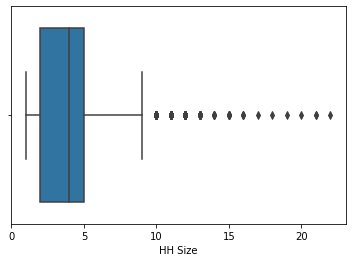

In [12]:
# Plot boxplot to visualise univariate outlier

sns.boxplot(x=HH_inhabitated['HH Size'])

<AxesSubplot:xlabel='Land Own'>

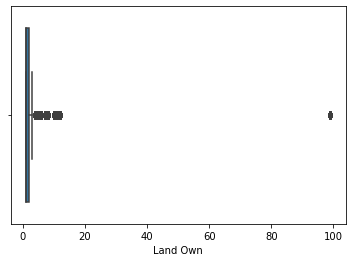

In [13]:
sns.boxplot(x=HH_inhabitated['Land Own'])

<AxesSubplot:xlabel='Land Own'>

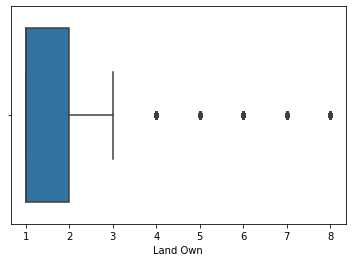

In [14]:
HH_LandOwn = HH_inhabitated[HH_inhabitated['Land Own'] <10]
sns.boxplot(x=HH_LandOwn['Land Own'])

<AxesSubplot:xlabel='Monthly HH expenses A'>

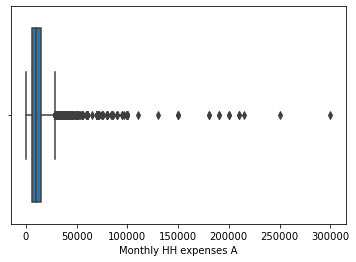

In [15]:
sns.boxplot(x=HH_inhabitated['Monthly HH expenses A'])

<AxesSubplot:xlabel='Impute Home grown B'>

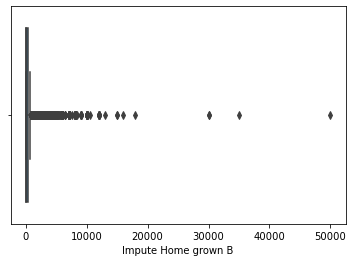

In [16]:
sns.boxplot(x=HH_inhabitated['Impute Home grown B'])

<AxesSubplot:xlabel='Wages in Kind C'>

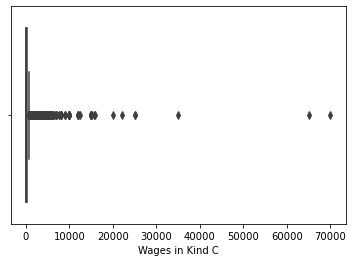

In [17]:
sns.boxplot(x=HH_inhabitated['Wages in Kind C'])

<AxesSubplot:xlabel='HH durable spent D'>

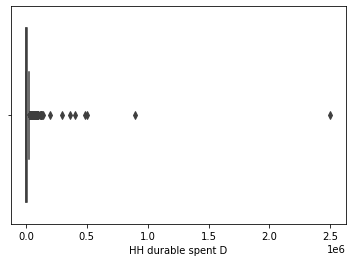

In [17]:
sns.boxplot(x=HH_inhabitated['HH durable spent D'])

<AxesSubplot:xlabel='Usual monthly expenses - ABCD'>

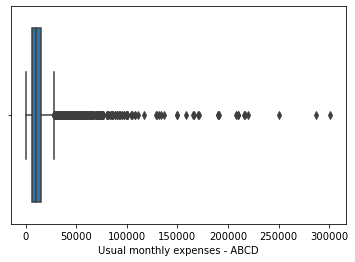

In [18]:
sns.boxplot(x=HH_inhabitated['Usual monthly expenses - ABCD'])

In [22]:
HH_new = HH_inhabitated.drop(columns = ["Casualty code"])

In [24]:
HH_new.dropna()

,FSU,Sector,State,District,Stratum,Sub-stratum,Sample HHID,InformantSI no,Response code,Survey code,...,HH durable spent D,Usual monthly expenses - ABCD,Cooking energy,lighting energy,Washing clothes,Sweeping floor,Dwelling structure,Care giver,NSC,Multiplier
671,20124,2,1,7,2,1,11,1.0,1,1,...,0.0,30000.0,2,1,1,2,3,1.0,4,27029
675,20275,2,1,7,2,1,1,1.0,1,1,...,0.0,15000.0,2,1,1,3,3,2.0,4,74800
676,20275,2,1,7,2,1,2,1.0,1,1,...,0.0,10000.0,2,1,2,2,3,2.0,4,74800
677,20275,2,1,7,2,1,3,1.0,1,1,...,0.0,20400.0,2,1,2,2,3,2.0,4,74800
678,20275,2,1,7,2,1,4,1.0,1,1,...,0.0,15000.0,2,1,2,1,3,2.0,4,74800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138458,24614,2,36,18,1,2,11,1.0,1,1,...,15000.0,10250.0,2,1,2,2,3,2.0,4,140979
138459,24614,2,36,18,1,2,12,1.0,1,1,...,9000.0,12750.0,2,1,2,2,3,2.0,4,140979
138460,24614,2,36,18,1,2,13,1.0,1,1,...,11000.0,15917.0,2,1,2,2,3,2.0,4,140979
138519,24853,2,36,23,4,1,2,3.0,2,1,...,0.0,32000.0,2,1,1,3,3,1.0,4,161229


<AxesSubplot:xlabel='HH Size'>

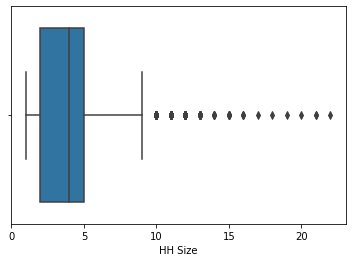

In [25]:
sns.boxplot(x=HH_new['HH Size'])

<AxesSubplot:xlabel='Land Own'>

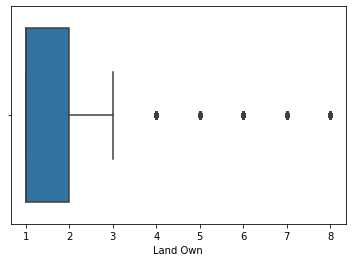

In [31]:
HH_LandOwn = HH_new[HH_new['Land Own'] <10]
sns.boxplot(x=HH_LandOwn['Land Own'])

<AxesSubplot:xlabel='Monthly HH expenses A'>

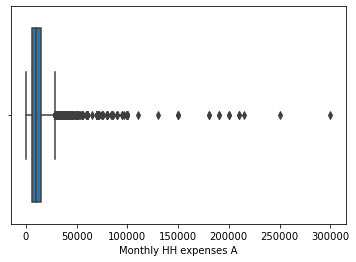

In [32]:
sns.boxplot(x=HH_new['Monthly HH expenses A'])

<AxesSubplot:xlabel='Impute Home grown B'>

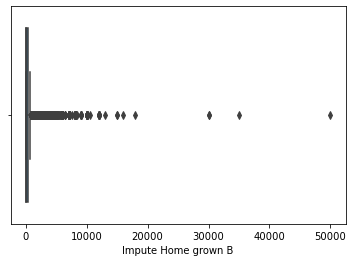

In [33]:
sns.boxplot(x=HH_new['Impute Home grown B'])